In [3]:
%matplotlib inline
from lightkurve import search_targetpixelfile, TessTargetPixelFile
import numpy as np

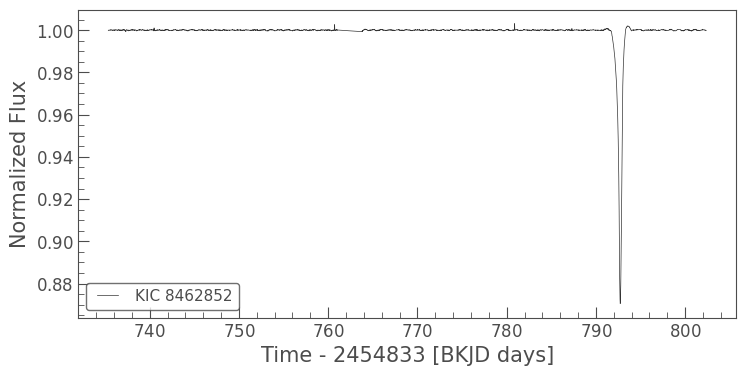

In [229]:
pixelfile1 = search_targetpixelfile("KIC 8462852", quarter=8).download(quality_bitmask='default');
lc1 = pixelfile1.to_lightcurve(aperture_mask=pixelfile1.pipeline_mask);
lc1_flatten = lc1.flatten();
lc1_flatten.plot();

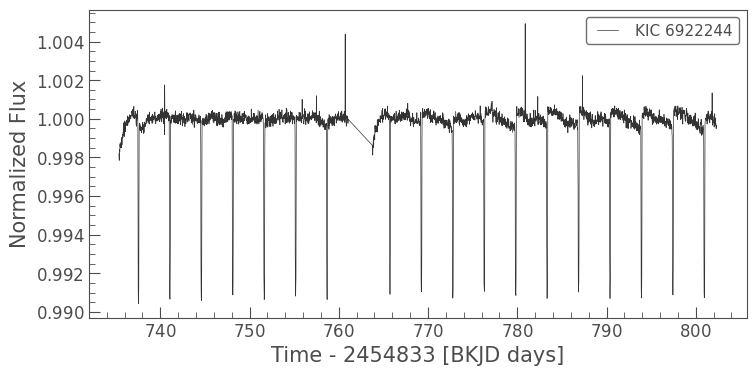

In [260]:
pixelfile2 = search_targetpixelfile("KIC 6922244", quarter=8).download(quality_bitmask='default');
lc2 = pixelfile2.to_lightcurve(aperture_mask=pixelfile2.pipeline_mask);
lc2_flatten = lc2.remove_nans().flatten(window_length=401);
lc2_flatten.plot();

In [335]:
periodo2 = lc2_flatten.to_periodogram(method="bls", period=np.arange(0.3, 10, 0.001))
periodo2.plot();

ValueError: The maximum transit duration must be shorter than the minimum period

In [233]:
period_value = periodo2.period_at_max_power
print('Period planet: {:.4f}'.format(period_value))

Period planet: 3.5220 d


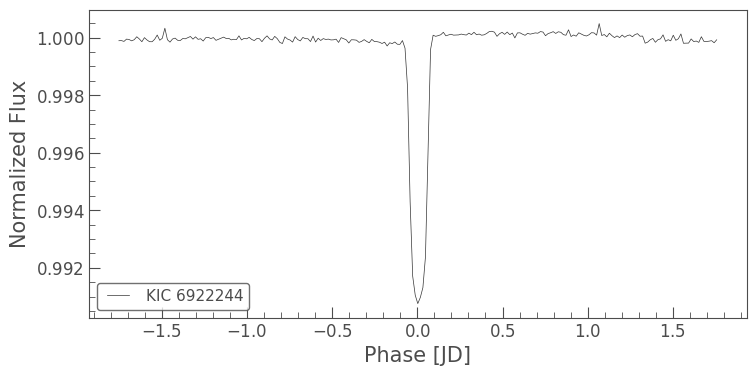

In [234]:
lc2_folded = lc2_flatten.fold(period=period_value, epoch_time=660.07);
lc2_bin = lc2_folded.bin(time_bin_size=0.015);
lc2_bin.plot();

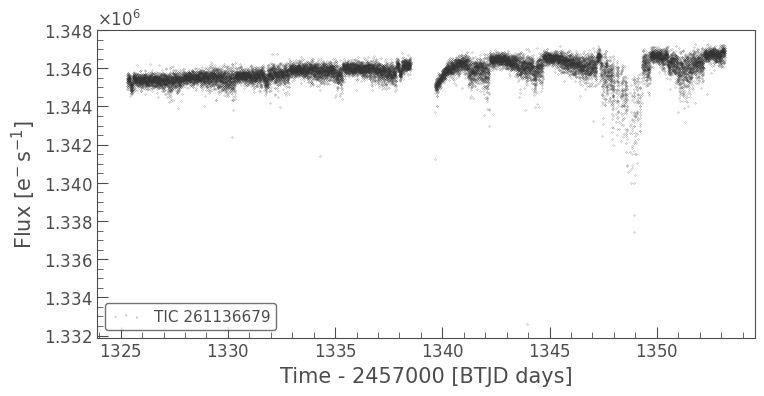

In [35]:
pixelfile3 = search_targetpixelfile("Pi Mensae", mission="TESS", sector=1).download(quality_bitmask='default');
aperture_mask = pixelfile3.create_threshold_mask(threshold=30);
lc3 = pixelfile3.to_lightcurve(aperture_mask=aperture_mask).remove_nans();
lc3 = lc3.remove_nans();
lc3.scatter(s=0.1);

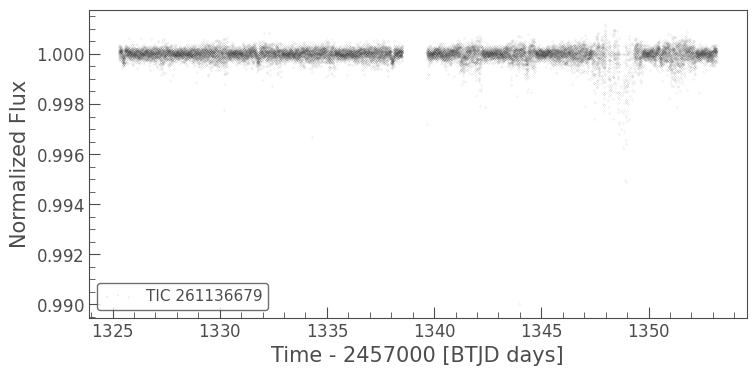

In [36]:
lc3_flatten = lc3.flatten(window_length=1001)
lc3_flatten.scatter(s=0.01);

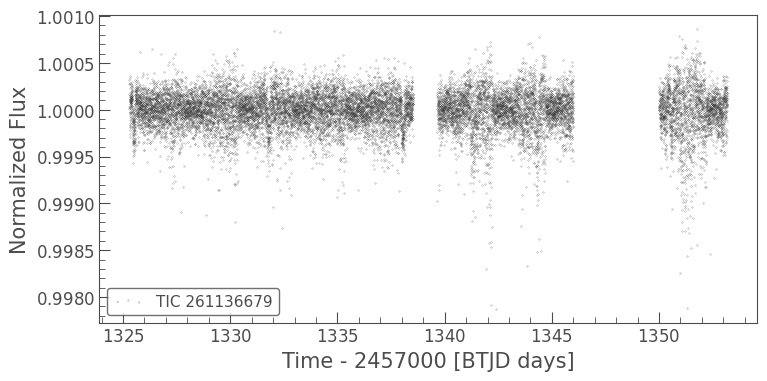

In [37]:
mask = (lc3_flatten.time.value < 1346) | (lc3_flatten.time.value > 1350);
lc3_flatten_masked = lc3_flatten[mask];
lc3_flatten_masked = lc3_flatten_masked.remove_outliers(sigma=10)
lc3_flatten_masked.scatter(s=0.1);

Period planet: 6.2730 d


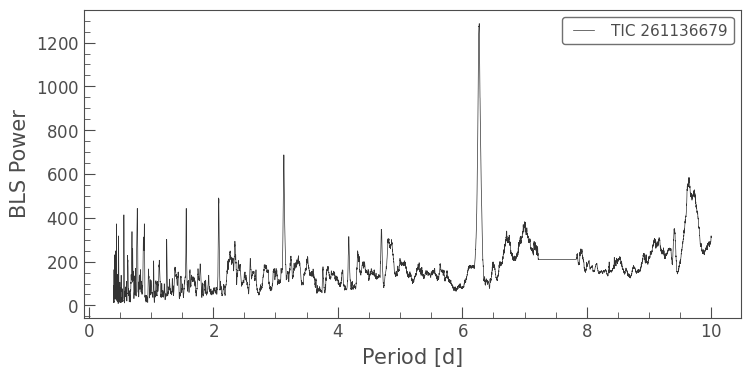

In [38]:
periodo3 = lc3_flatten_masked.to_periodogram(method="bls", period=np.arange(0.4, 10, 0.001))
periodo3.plot();
period_value = periodo3.period_at_max_power
print('Period planet: {:.4f}'.format(period_value))

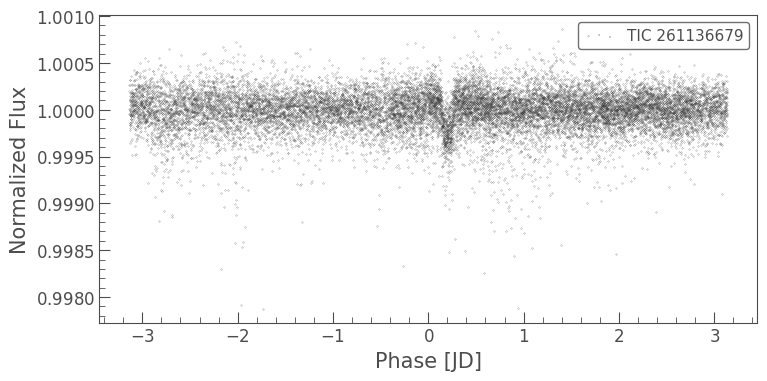

In [45]:
lc3_folded = lc3_flatten_masked.fold(period=period_value);
lc3_folded.scatter(s=0.1);

In [46]:
lc3_bin = lc3_folded.bin(time_bin_size=0.00001);

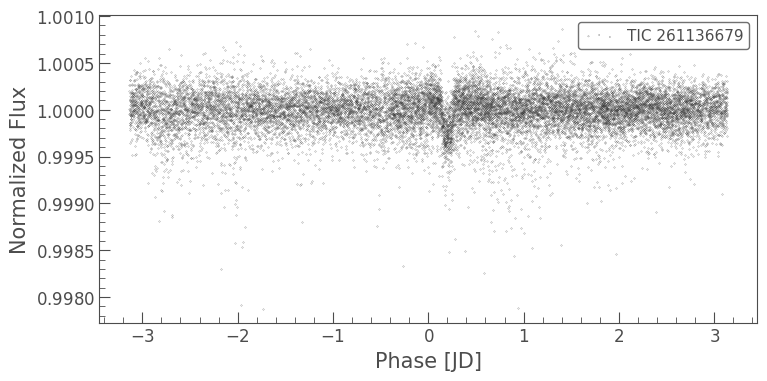

In [47]:
lc3_bin.scatter(s=0.1);

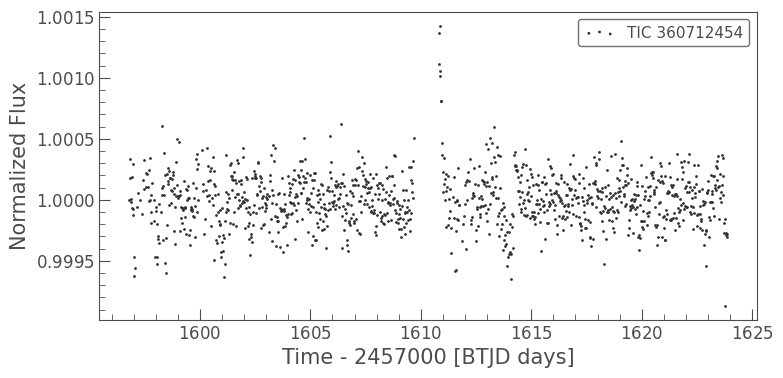

In [282]:
pixelfile4 = TessTargetPixelFile('./TIC_3607124542/hlsp_tess-spoc_tess_phot_0000000360712454-s0011_tess_v1_tp.fits');
aperture_mask = pixelfile4.create_threshold_mask(threshold=10);
#lc4_flatten = pixelfile4.to_lightcurve(aperture_mask=pixelfile4.pipeline_mask).flatten();
#lc4_flatten = pixelfile4.to_lightcurve(aperture_mask='all').flatten();
#lc4_flatten = pixelfile4.to_lightcurve(aperture_mask=aperture_mask).flatten();
lc4_flatten = pixelfile4.to_lightcurve().flatten();
#lc4_flatten = lc4_flatten.remove_outliers(sigma=9).flatten();
lc4_flatten.scatter();

Period planet: 6.6330 d


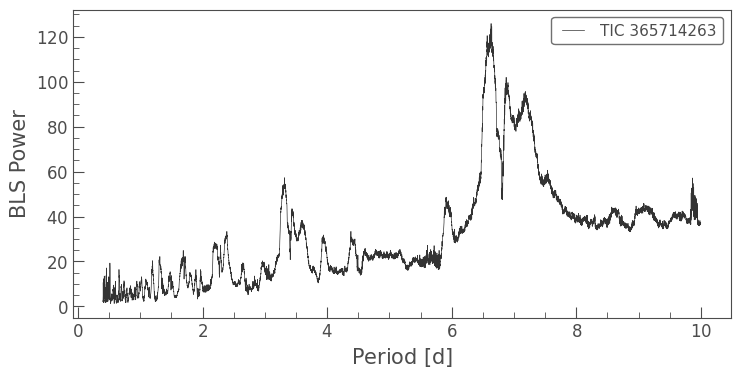

In [256]:
periodo4 = lc4_flatten.to_periodogram(method="bls", period=np.arange(0.4, 10, 0.001))
periodo4.plot();
period_value = periodo4.period_at_max_power
print('Period planet: {:.4f}'.format(period_value))

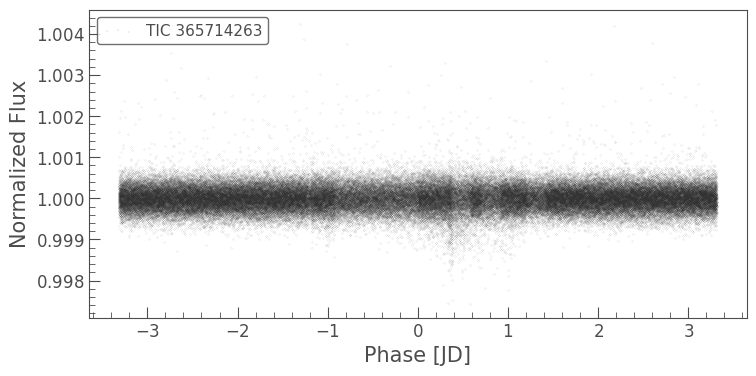

In [257]:
lc4_folded = lc4_flatten.fold(period=period_value);
lc4_folded.scatter(s=0.01);